<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°05

## Objetivos de la clase

* Reforzar los conceptos básicos de visualización.

## Contenidos

* [Problema 01](#p1)


## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","company_sales_data.csv"))
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

In [66]:
df1=pd.DataFrame(df['month_number'])
df2=pd.DataFrame(df['total_profit'])
df3=pd.concat([df1,df2],axis=1,sort=False)
df3

,month_number,total_profit
0,1,211000
1,2,183300
2,3,224700
3,4,222700
4,5,209600
5,6,201400
6,7,295500
7,8,361400
8,9,234000
9,10,266700


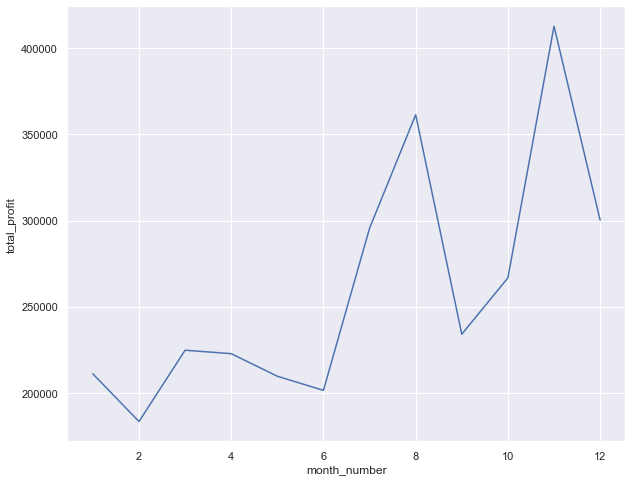

In [76]:
sns.lineplot(
    x='month_number',
    y='total_profit',
    data=df3,
    ci=None,
)

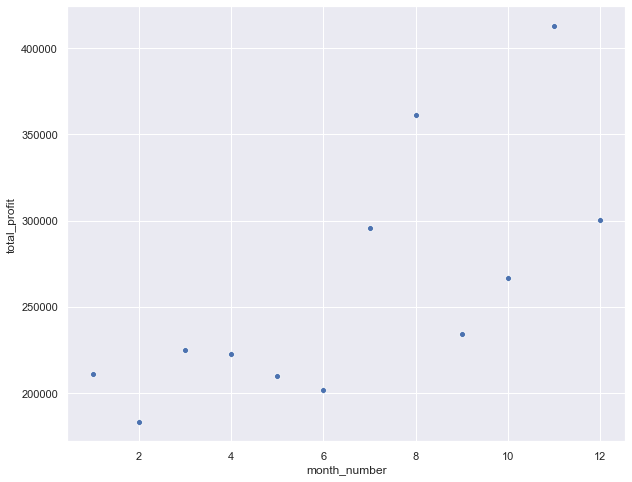

In [75]:
sns.scatterplot(
   x='month_number',
   y='total_profit',
    data=df3,
    ci=None,
)

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

In [68]:
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


Text(0, 0.5, 'sold units')

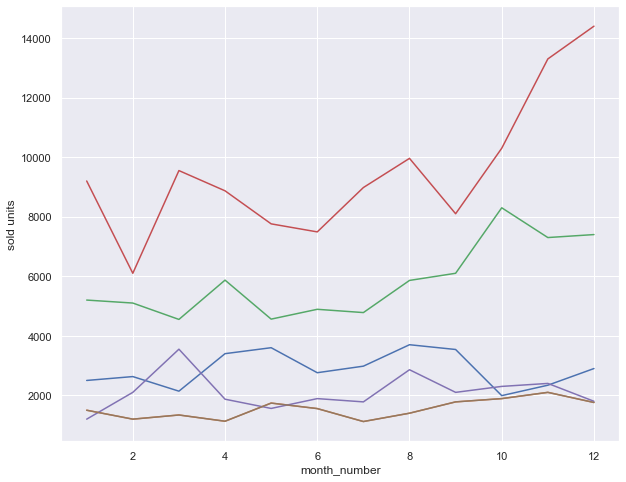

In [159]:
palette1=sns.color_palette("hls",6)
columns=['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']
for product in columns:
    sns.lineplot(
        x='month_number',
        y=product,
        data=df,
        ci=None,
        palette=palette1,
     )

plt.ylabel('sold units')


3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

In [138]:
#asumí que debía resumir la cantidad de productos vendidos en el año, por lo que el gráfico de barras
#tiene la cantidad total de unidades vendidas por los dos porductos en el año
df4=pd.DataFrame(df['month_number'])
df5=pd.DataFrame(df['facecream'])
df6=pd.DataFrame(df['facewash'])
df7=pd.concat([df4,df5],axis=1,sort=False)
df8=pd.concat([df4,df6],axis=1,sort=False)
df9=pd.merge(df7,df8,on='month_number')
df9

,month_number,facecream,facewash
0,1,2500,1500
1,2,2630,1200
2,3,2140,1340
3,4,3400,1130
4,5,3600,1740
5,6,2760,1555
6,7,2980,1120
7,8,3700,1400
8,9,3540,1780
9,10,1990,1890


In [140]:
total_units_facecream=sum(list(df9['facecream']))        #se suman las cantidades de unidades vendidas por mes para
total_units_facewash=sum(list(df9['facewash']))          #calcular el total en el año
df10=pd.DataFrame({ 'productos':['facecream','facewash'],
                    'total de unidades vendidas en el año':[total_units_facecream,total_units_facewash]}
                  ,index=[1,2])     #se crea un dataframe con la información de las unidades totales
df10

,productos,total de unidades vendidas en el año
1,facecream,34480
2,facewash,18515


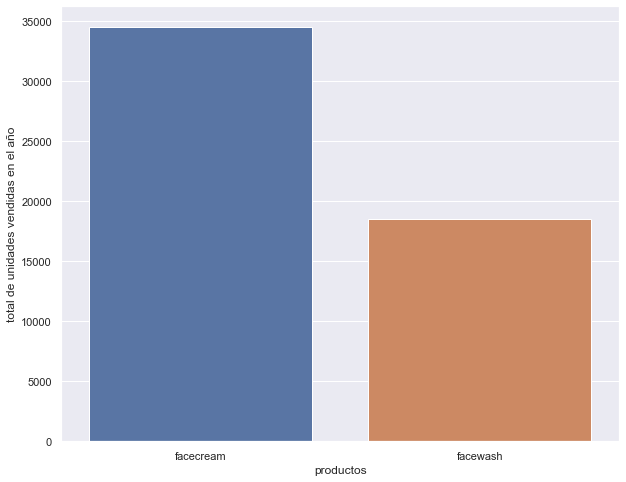

In [137]:
sns.barplot(
    x='productos',
    y='total de unidades vendidas en el año',
    data=df10,
)

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

In [146]:
productos_df=df.drop(['month_number','total_units','total_profit'],axis=1)
productos_df

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,2500,1500,5200,9200,1200,1500
1,2630,1200,5100,6100,2100,1200
2,2140,1340,4550,9550,3550,1340
3,3400,1130,5870,8870,1870,1130
4,3600,1740,4560,7760,1560,1740
5,2760,1555,4890,7490,1890,1555
6,2980,1120,4780,8980,1780,1120
7,3700,1400,5860,9960,2860,1400
8,3540,1780,6100,8100,2100,1780
9,1990,1890,8300,10300,2300,1890


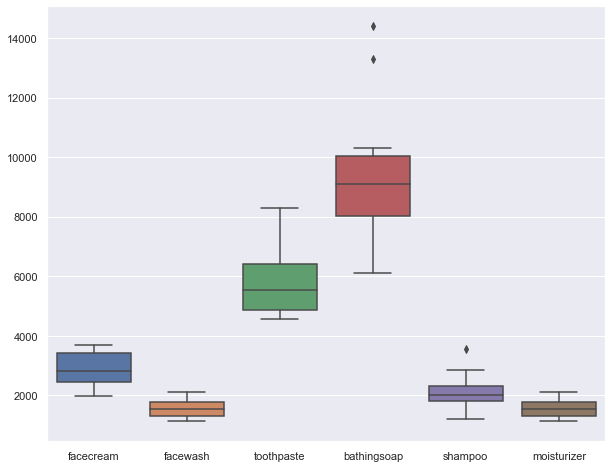

In [147]:
sns.boxplot(data=productos_df)

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

In [153]:
productos_df=df.drop(['month_number','total_units','total_profit'],axis=1)
lista_de_productos=list(productos_df.columns)

lista_unidades=[]
for k in lista_de_productos:
        total_unidades=sum(list(productos_df[k]))
        lista_unidades.append(total_unidades)
df11=pd.DataFrame({'productos':lista_de_productos,
                    'total_unidades':lista_unidades},index=[1,2,3,4,5,6])


,productos,total_unidades
1,facecream,34480
2,facewash,18515
3,toothpaste,69910
4,bathingsoap,114010
5,shampoo,25410
6,moisturizer,18515


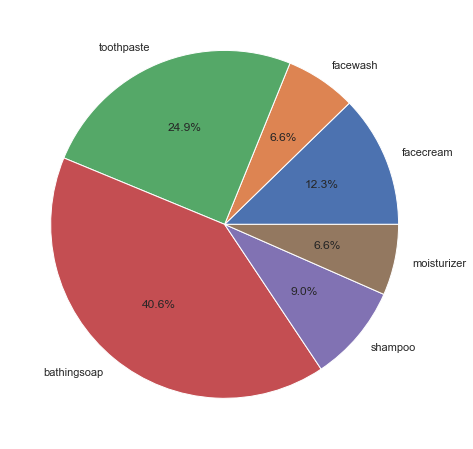

In [158]:
figure1,ax1=plt.subplots()
ax1.pie(
    df11['total_unidades'],
    labels=df11['productos'],
    autopct='%1.1f%%',
    shadow=False,
)
plt.show()
#el gráfico de torta presenta los porcentajes del aporte de cada producto
#al total de unidades vendidas de todos los productos